# Information Warfare
## Russia’s use of Twitter during the 2016 US Presidential Election
---

In [46]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

import plotly.io as pio
import plotly.express as px

from IPython.display import Image

## Import Data

In [2]:
embeddings_dataframe = pd.read_csv("./data/tweet-embeddings.csv")

embeddings_matrix = embeddings_dataframe.iloc[:, 2:].values

embeddings_dataframe.head()

,author,account_category,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,4MYSQUAD,LeftTroll,0.300563,-0.161981,0.324077,-0.184767,-0.401428,0.023190,-1.024363,-0.539152,...,-1.114124,-0.170226,-0.404546,-0.268519,-0.118784,-0.606631,0.989648,-0.660811,1.125824,1.370626
1,AANTIRACIST,LeftTroll,0.451109,-0.020116,0.192492,0.028853,-0.021786,0.192751,-0.503659,0.378062,...,-0.106547,0.070519,0.627671,-0.515366,0.283998,0.203148,0.210351,-0.418066,1.081024,0.693167
2,ABIGAILSSILK,HashtagGamer,1.735189,0.831031,-0.338486,1.515348,-0.361864,0.743236,-0.855088,0.452886,...,-0.142353,-0.149393,0.342377,-0.473787,1.310697,0.376032,0.050319,-0.675580,0.686694,1.331772
3,ABIISSROSB,RightTroll,-0.414186,-0.289592,-0.376067,0.655795,-0.528225,0.051180,-1.284282,0.838184,...,-0.602859,-0.430198,0.870506,-0.583094,-0.743793,0.218668,-0.415719,-0.283268,0.107426,0.429906
4,ABMERRLINS,RightTroll,-0.168891,0.208332,-0.238793,0.811466,-0.406548,0.060785,-1.138488,0.822740,...,-0.338444,-0.262768,0.911135,-0.639410,-0.448718,0.144847,-0.528141,-0.074614,0.056181,0.204943


## Dimension Reduction (t-SNE) and Visualization

In [15]:
tsne_35 = TSNE(n_components=2, perplexity=35, verbose=0 , n_iter = 1000)\
                .fit_transform(embeddings_matrix)

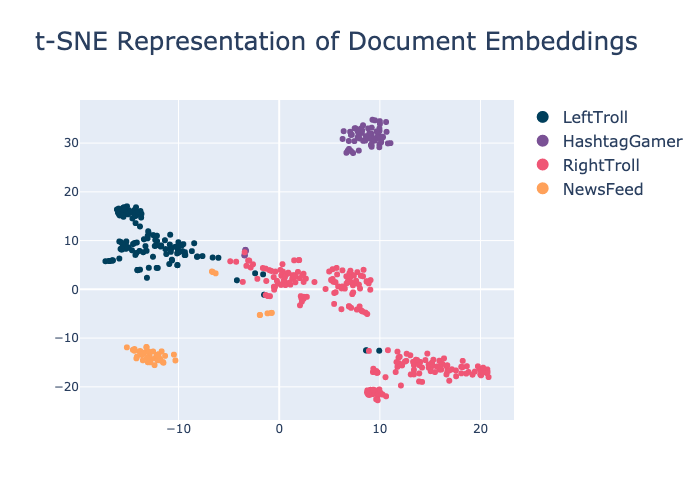

In [32]:
color_mapping = {'LeftTroll':'#003f5c', 'RightTroll': '#ef5675', 'HashtagGamer': '#7a5195', 'Newsfeed': '#ffa600'}

fig = px.scatter(x=tsne_35[:,0], 
                 y=tsne_35[:,1], 
                 color=embeddings_dataframe.account_category,
                 color_discrete_map=color_mapping,
                 title="t-SNE Representation of Document Embeddings")

fig.update_layout(yaxis={'title':None}, 
                  xaxis={'title':None}, 
                  legend_title_text=None,
                  legend={'font':{'size':16}, 'itemsizing':'constant'},
                  title={'font':{'size':25}})

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# Logistic Regression

In [48]:
X_train, X_test, y_train, y_test = train_test_split(embeddings_dataframe.iloc[:,2:], 
                                                    embeddings_dataframe.account_category,
                                                    stratify=embeddings_dataframe.account_category)

In [49]:
embeddings_dataframe.account_category.value_counts()

RightTroll      223
LeftTroll       118
HashtagGamer     63
NewsFeed         45
Name: account_category, dtype: int64

In [50]:
logreg = OneVsRestClassifier(LogisticRegression(solver = 'liblinear'))

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [51]:
print("Accuracy Score: ",accuracy_score(y_test, y_pred), "\n", "\n")
print(classification_report(y_test, y_pred))

Accuracy Score:  0.9823008849557522 
 

              precision    recall  f1-score   support

HashtagGamer       1.00      0.94      0.97        16
   LeftTroll       1.00      0.97      0.98        30
    NewsFeed       1.00      1.00      1.00        11
  RightTroll       0.97      1.00      0.98        56

    accuracy                           0.98       113
   macro avg       0.99      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113

